# 7.	Develop a program to demonstrate the working of Linear Regression and Polynomial Regression.Use Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction) for Polynomial Regression.


# Linear Regression

Linear Regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the data.

Polynomial Regression is an extension of Linear Regression where the relationship between the independent and dependent variables is modeled as an nn-degree polynomial. It allows for capturing non-linear relationships.

Linear Regression:
Mean Squared Error: 0.5558915986952422
R^2 Score: 0.5757877060324524


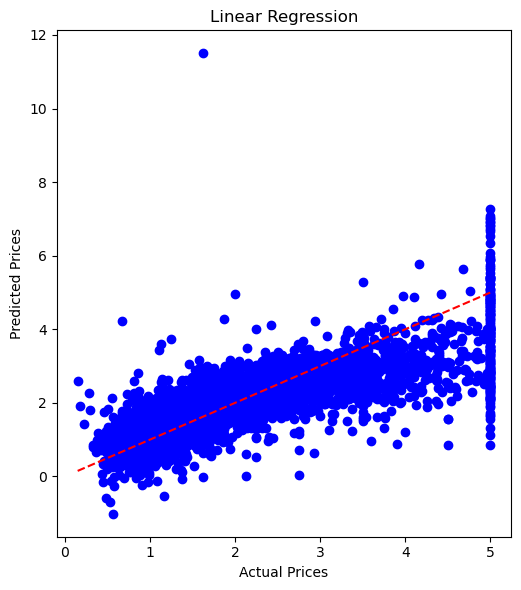

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the California Housing Dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Linear Regression
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R^2 Score: {r2_linear}")


# Step 4: Visualization
# Plot the results
plt.figure(figsize=(10, 6))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')



plt.tight_layout()
plt.show()

Mean Squared Error: 0.47


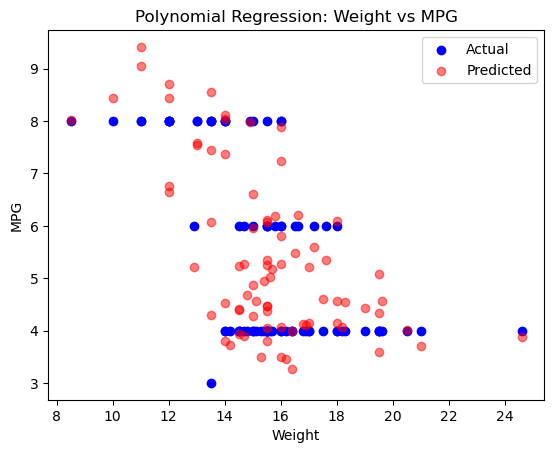

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
df = pd.read_csv(dataset_url, delim_whitespace=True, names=columns, na_values='?')

# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'horsepower' column to numeric
df['horsepower'] = df['horsepower'].astype(float)

# Features and target selection
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Train the Polynomial Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualization (for single feature: weight vs mpg)
plt.scatter(X_test['weight'], y_test, color='blue', label='Actual')
plt.scatter(X_test['weight'], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Polynomial Regression: Weight vs MPG')
plt.legend()
plt.show()
